# Exercises on NFA

You may wish to watch my lecture on NFA a little, then play with the
code below, and then finish watching.

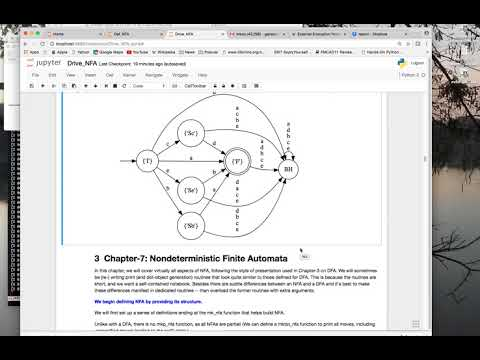

In [1]:
# This Youtube video walks through this notebook
from IPython.display import YouTubeVideo
YouTubeVideo('xjFtLF95uBc')

In [2]:
import sys
sys.path[0:0] = ['../..','../../3rdparty'] # Put these at the head of the search path
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

In [3]:
# Our automd markdown works for NFA also. Here is the NFA for
# the language "ends in 0101"

NFA_ends0101 = md2mc(''' 
!!---------------------------------------------------------------------------
!! This NFA looks for patterns of the form 
!!
!!     ......<some 0's and 1's>.....0101
!!
!! i.e., all strings that end in 0101.
!!
!! This example (over and above thirdlastis1.nfa) also illustrates
!! the power of nondeterminism. Anytime we see a 0 from state I, we
!! can have the NFA speculate that it is seeing the beginning of a
!! 0101 pattern! If the NFA fails in its guess, it pays no price
!! (because another guess is soon coming from behind).
!!
!! * We take 4 states in the NFA solution. The DFA solution takes
!!   5 states.
!!
!! * This shows how burden is shifted from the
!!   human to the computer doing the NFA simulation.
!!   Even though the savings in states is not dramatic,
!!   the effort to build this NFA is much lower than building
!!   the corresponding DFA.
!! 
!!-----------------------------------------------------------------
!! For NFA, each line can be as follows:
!!
!! State : in1 | in2 ...  ->  COmma, Separated, State, List  !! comment
!!-----------------------------------------------------------------

NFA

I    : 1   -> I      !! I goes to I upon 1

I    : 0   -> S0, I  !! I goes to S0 and I upon 0

S0   : 1   -> S01    !! S0 goes to S01 upon 1

S01  : 0   -> S010   !! S01 goes to S010 upon 0

S010 : 1   -> F      !! S010 goes to F upon F

!!---
''')

In [4]:
# Now let us see the dict version of the NFA
NFA_ends0101 

{'Delta': {('I', '0'): {'I', 'S0'},
  ('I', '1'): {'I'},
  ('S0', '1'): {'S01'},
  ('S01', '0'): {'S010'},
  ('S010', '1'): {'F'}},
 'F': {'F'},
 'Q': {'F', 'I', 'S0', 'S01', 'S010'},
 'Q0': {'I'},
 'Sigma': {'0', '1'}}

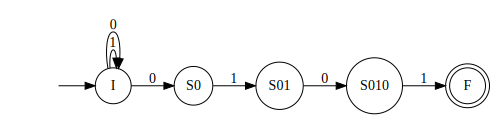

In [5]:
# Let's see the drawing of this NFA

dotObj_nfa(NFA_ends0101)  

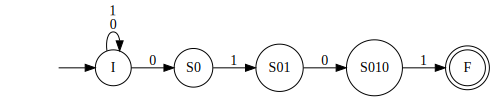

In [6]:
# The drawing produces separated self-loops. Let's fuse 'em

# Now we are going to fuse the separate self-loops into one

dotObj_nfa(NFA_ends0101, FuseEdges=True) 

# NFA for 3rd-last is 1

In [7]:
# Here is the automd (markdown) for an NF whose third-last symbol is a 1

NFA_3rdlast_1 = md2mc('''
NFA

I : 0  | 1  -> I  !! Upon a 0 or a 1, continue to stay in state I

I : ''      -> S0 !! Nondeterministically transition to state S0

S0 : 1      -> S1 !! This is the key "1" (third-last being 1) seen

S1 : 0 | 1  -> S2 !! One 0/1 takes the NFA to S2

S2 : 0 | 1  -> F  !! One more 0/1 takes the NFA to F

''')

In [8]:
# Let us see its internal representation

NFA_3rdlast_1

{'Delta': {('I', ''): {'S0'},
  ('I', '0'): {'I'},
  ('I', '1'): {'I'},
  ('S0', '1'): {'S1'},
  ('S1', '0'): {'S2'},
  ('S1', '1'): {'S2'},
  ('S2', '0'): {'F'},
  ('S2', '1'): {'F'}},
 'F': {'F'},
 'Q': {'F', 'I', 'S0', 'S1', 'S2'},
 'Q0': {'I'},
 'Sigma': {'0', '1'}}

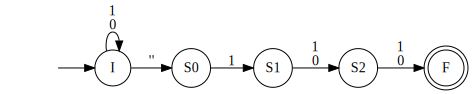

In [9]:
# Let us see this NFA drawn out

dotObj_nfa(NFA_3rdlast_1, FuseEdges=True)

In [10]:
# Let's step the NFA on epsilon   
step_nfa(NFA_3rdlast_1, "I", "")

{'S0'}

In [11]:
# Let's step it on '0'  
step_nfa(NFA_3rdlast_1, "I", "0")

{'I'}

In [12]:
# Step it on a "1" to see two next states. That shows nondeterminism!

step_nfa(NFA_3rdlast_1, "I", "1")  

{'I'}

In [13]:
# What is the Eclosure of the set of states {I} ?

Eclosure(NFA_3rdlast_1, {"I"})

{'I', 'S0'}

In [14]:
help(accepts_nfa)

Help on function accepts_nfa in module jove.Def_NFA:

accepts_nfa(N, s, chatty=False)
    NFA acceptance.
    Input : N : given NFA
            s : given string
            chatty : Boolean (prints accepting path,
                     which is the state-sets encountered).



In [15]:
accepts_nfa(NFA_3rdlast_1, "0100100", chatty=True)

States reached =  {'I', 'S0'}
States reached =  {'I', 'S0', 'S1'}
States reached =  {'S2', 'I', 'S0'}
States reached =  {'F', 'S0', 'I'}
States reached =  {'I', 'S0', 'S1'}
States reached =  {'S2', 'I', 'S0'}
States reached =  {'F', 'S0', 'I'}
NFA accepts '0100100' by reaching {'F', 'S0', 'I'}


True

# Let us run NFA interactively via widgets

We have two NFA to play with, namely nfa_ends0101 and NFA_3rdlast_1


In [16]:
import ipywidgets as wdg
def run_nfa_slider(N, s, n):
    """Run NFA N from N["Q0"] (which is a set..) on substring s[0:n]
    """
    S = N["Q0"] 
    if (n > len(s)):
        n = len(s)
    print("string = ", s[0:n])
    run_nfa(N, S, s[0:n], True)
    
def run_nfa_int(N1, N2):
    """Run interactively from the given NFA .. from {q0} 
       on input string's substring
       as picked by slider.
    """
    inp = input("Please provide string: ")
    wdg.interact(run_nfa_slider, N = {'N1': N1, 'N2': N2}, 
                 s = inp, n=(0,32))
    
def test_run_nfa_int(N1, N2):
    """Test the interactive run of NFA.
    """
    run_nfa_int(N1, N2)

#-- enable this later. test_run_nfa_int()

## Once you run the command below, provide a string

Provide a string of 0's and 1's. Then you can use the pull-down to pick the NFA
to test, and the slider to incrementally consume more of the input string


In [17]:
test_run_nfa_int(NFA_ends0101, NFA_3rdlast_1)

string =  010010101
States reached =  {'I', 'S0'}
States reached =  {'S01', 'I'}
States reached =  {'S0', 'S010', 'I'}
States reached =  {'I', 'S0'}
States reached =  {'S01', 'I'}
States reached =  {'S0', 'S010', 'I'}
States reached =  {'S01', 'I', 'F'}
States reached =  {'S0', 'S010', 'I'}
States reached =  {'S01', 'I', 'F'}


# NFA to DFA conversion

Let's do the NFA to DFA conversion on two NFA, one being 3rd-last is 1
and another being fourth-last is 1. You'll see the state explosion


In [18]:
# Here is the automd (markdown) for an NF whose third-last symbol is a 1

NFA_4thlast_1 = md2mc('''
NFA

I : 0  | 1  -> I  !! Upon a 0 or a 1, continue to stay in state I

I : ''      -> S0 !! Nondeterministically transition to state S0

S0 : 1      -> S1 !! This is the key "1" (third-last being 1) seen

S1 : 0 | 1  -> S2 !! One 0/1 takes the NFA to S2

S2 : 0 | 1  -> S3 !! One more 0/1 takes the NFA to S3

S3 : 0 | 1  -> F  !! Now we are at the final state

''')

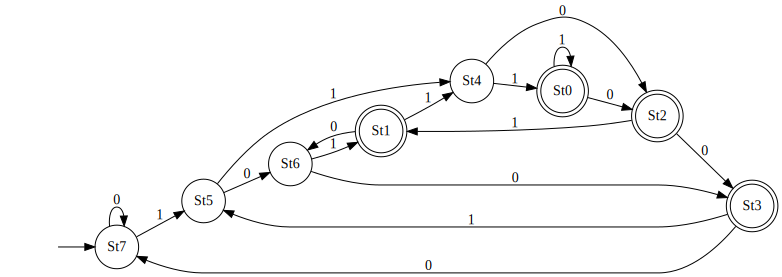

In [19]:
dotObj_dfa(nfa2dfa(NFA_3rdlast_1), FuseEdges=True)

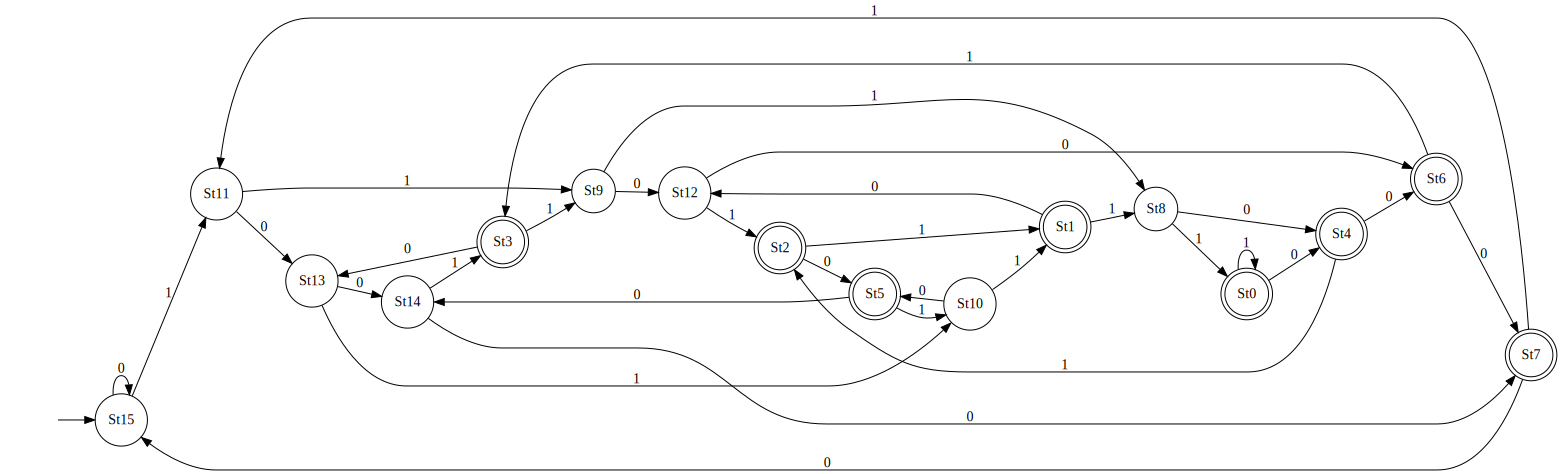

In [20]:
dotObj_dfa(nfa2dfa(NFA_4thlast_1), FuseEdges=True)

# Brzozowski's DFA minimization

We will practice Brzozowski minimization on "blimp", a bloated DFA



Picking up from our earlier discussions, to minimize a DFA using Brzozowski's algorithm, here are the steps:

* Make sure that the given DFA has no unreachable states
* Reverse the DFA
* Determinize it
* Reverse that DFA
* Determinize it

Thus we need to write a routine to reverse a DFA. We already have a way to ensure that a DFA does not have unreachable states (in another Jupyter notebook; we won't bother to include it here, and trust the user to always provide such DFA only).

We can observe that if a DFA has black-hole states, then those states won't matter in the reversed machine (reversed NFA). Thus, we can work with __partial__ dfa (i.e., DFA that are partially consistent).

In [21]:
blimp = md2mc('''
DFA 
I1 : a -> F2
I1 : b -> F3
F2 : a -> S8
F2 : b -> S5
F3 : a -> S7
F3 : b -> S4
S4 : a | b -> F6
S5 : a | b -> F6
F6 : a | b -> F6
S7 : a | b -> F6
S8 : a -> F6
S8 : b -> F9
F9 : a -> F9
F9 : b -> F6
''')

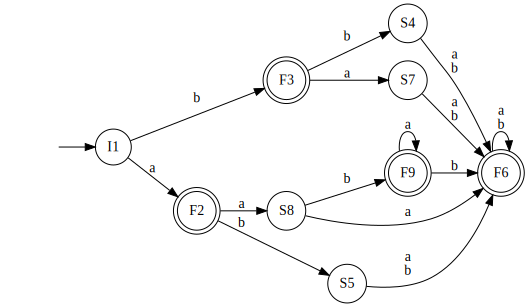

In [22]:
dotObj_dfa(blimp, FuseEdges=True)

In [23]:
rev_dfa

<function jove.Def_NFA.rev_dfa>

In [24]:
nfa2dfa

<function jove.Def_NFA.nfa2dfa>

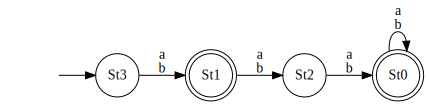

In [25]:
# Brzozowski minimization is R;D;R;D

dotObj_dfa(nfa2dfa(rev_dfa(nfa2dfa(rev_dfa(blimp)))), FuseEdges = True)

In [26]:
# This is also directly available as a single command

min_dfa_brz

<function jove.Def_NFA.min_dfa_brz>

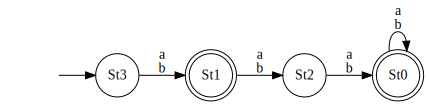

In [27]:
dotObj_dfa(min_dfa_brz(blimp), FuseEdges = True)

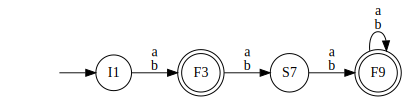

In [28]:
# Same result as standard minimization

dotObj_dfa(min_dfa(blimp), FuseEdges = True)